In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\us953\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
# Define the mapping from numeric to categorical headers
header_mapping = {
    '1': "Id",
    '1.52101': "RI",
    '13.64': "Na",
    '4.49': "Mg",
    '1.10': "Al",
    '71.78': "Si",
    '0.06': "K",
    '8.75': "Ca",
    '0.00': "Ba",
    '0.00.1': "Fe",
    '1.1': "Type of glass"
}

# Rename the columns using the mapping
df = df.rename(columns=header_mapping)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [4]:
# Drop unnecessary columns
df.drop(['Id'], axis=1, inplace=True)

# Exploratory Data Analysis

In [5]:
# Size of dataset.
df.shape

(213, 10)

##### This dataset contains 213 rows and 10 columns, out of which one column represents the target variable and the remaining eleven columns are independent variables.

In [6]:
# Number of columns present in this dataset.
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [7]:
# Checking the data type of columns.
df.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [8]:
# null values are not present.
df.isna().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [9]:
# Information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<Axes: >

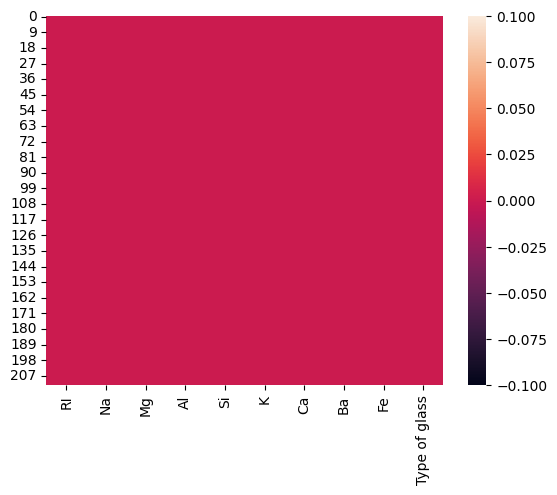

In [10]:
# representing null values by heatmap.
sns.heatmap(df.isnull())

In [11]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [12]:
# checking unique values.
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [13]:
# counting the unique values.
df['Type of glass'].value_counts()

Type of glass
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [14]:
# getting summary description of dataset.
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
# As we can see, 'count' indicates the total number of values present in columns. Additionally, 
# minor differences between the mean and median (50%) suggest potential left or right skewness, which we will observe later.

# Moreover, observations at the 75th percentile and the maximum value ('max') indicate the presence of outliers in Na,
# Al, Si, K, Ca, Ba, Fe, and Type of glass.

### Univariate Analysis

Type of glass
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

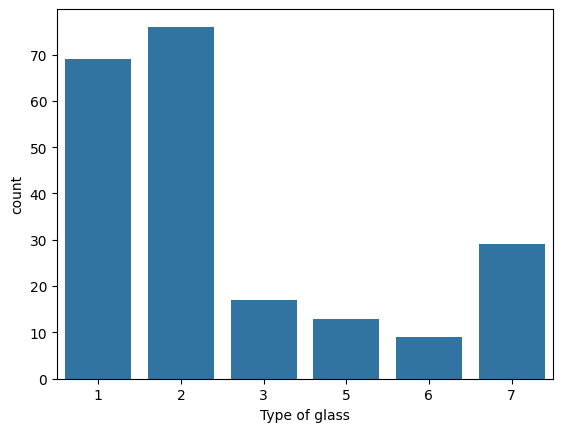

In [16]:
ax = sns.countplot(x= 'Type of glass', data=df)
df['Type of glass'].value_counts()

In [17]:
# Change values based on conditions
df.loc[df['Type of glass'].isin([1, 2, 3, 4]), 'Type of glass'] = 'window glass'
df.loc[df['Type of glass'].isin([5, 6, 7]), 'Type of glass'] = 'non-window glass'

Type of glass
window glass        162
non-window glass     51
Name: count, dtype: int64

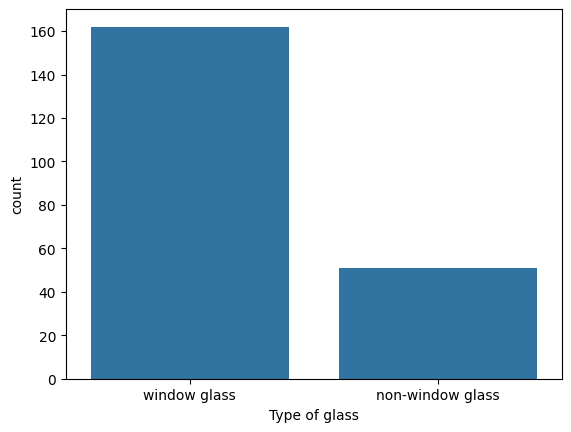

In [18]:
ax = sns.countplot(x= 'Type of glass', data=df)
df['Type of glass'].value_counts()

In [19]:
# As we can see, there is a significant difference between 'non-window glass ' and 'window glass ', indicating a 
# class imbalance that can be addressed using oversampling methods.

#### Checking outliers

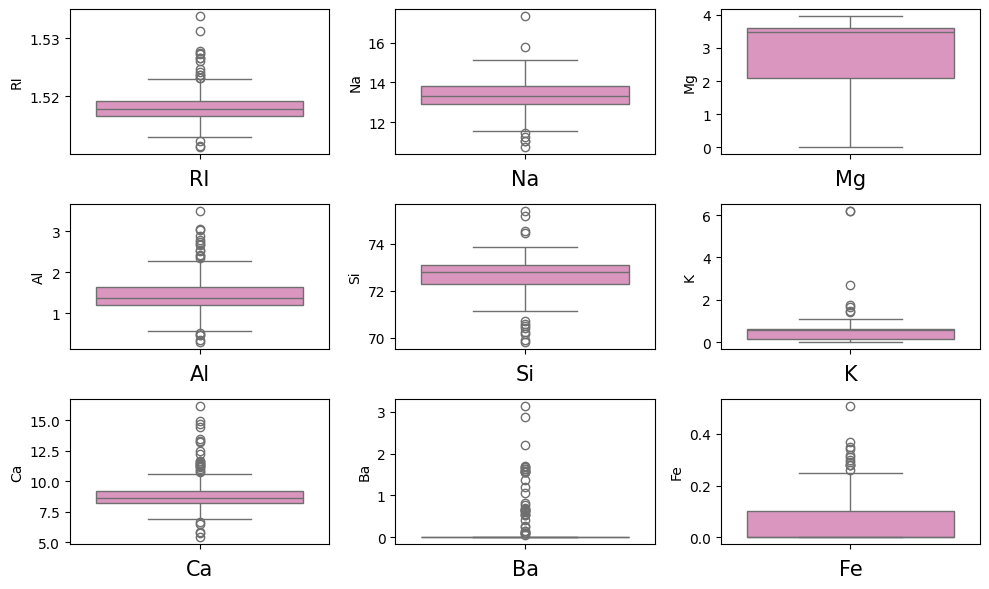

In [20]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

## We can clearling see the outliers are present in this data set

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [22]:
# Encoding categorial columns using OrdinalEncodes

In [23]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1.0
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1.0
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1.0
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1.0
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1.0
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,0.0
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,0.0
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,0.0
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,0.0


In [25]:
# checking skewness in dataset.
df.skew()

RI               1.639658
Na               0.457318
Mg              -1.154323
Al               0.900017
Si              -0.744546
K                6.549276
Ca               2.040591
Ba               3.406749
Fe               1.747173
Type of glass   -1.229860
dtype: float64

In [89]:
# As we can observe, some of the parameters have values exceeding +0.5, such as RI, Al, Ca, Ba, Fe,
# and K.

### Checking visualization presentation

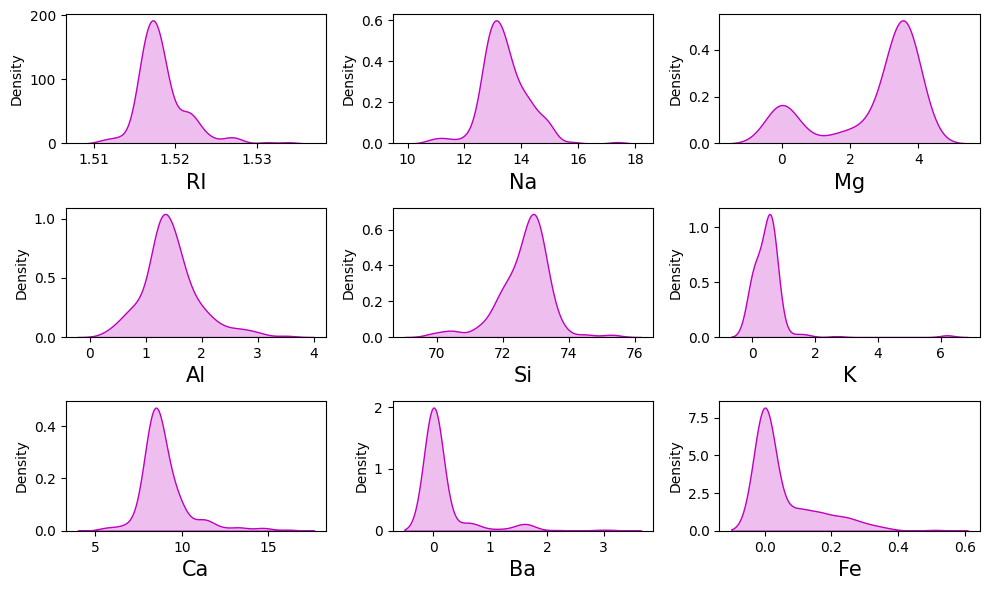

In [27]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

##### Removing Skewness

In [28]:
# Removing the skewness by using Cube root square.
df['RI'] = np.cbrt(df['RI'])

# Removing the skewness by using Cube root square.
df['Al'] = np.cbrt(df['Al'])

# Removing the skewness by using Cube root square.
df['Ca'] = np.cbrt(df['Ca'])

# Removing the skewness by using Cube root square.
df['Ba'] = np.cbrt(df['Ba'])

# Removing the skewness by using Cube root square.
df['Fe'] = np.cbrt(df['Fe'])

# Removing the skewness by using Cube root square.
df['K'] = np.cbrt(df['K'])

# Removing the skewness by using Cube root square.
df['Mg'] = np.cbrt(df['Mg'])

In [29]:
# after removing all the skewness.
df.skew()

RI               1.631276
Na               0.457318
Mg              -1.434030
Al              -0.212025
Si              -0.744546
K               -0.602542
Ca               1.402709
Ba               2.065220
Fe               0.887382
Type of glass   -1.229860
dtype: float64

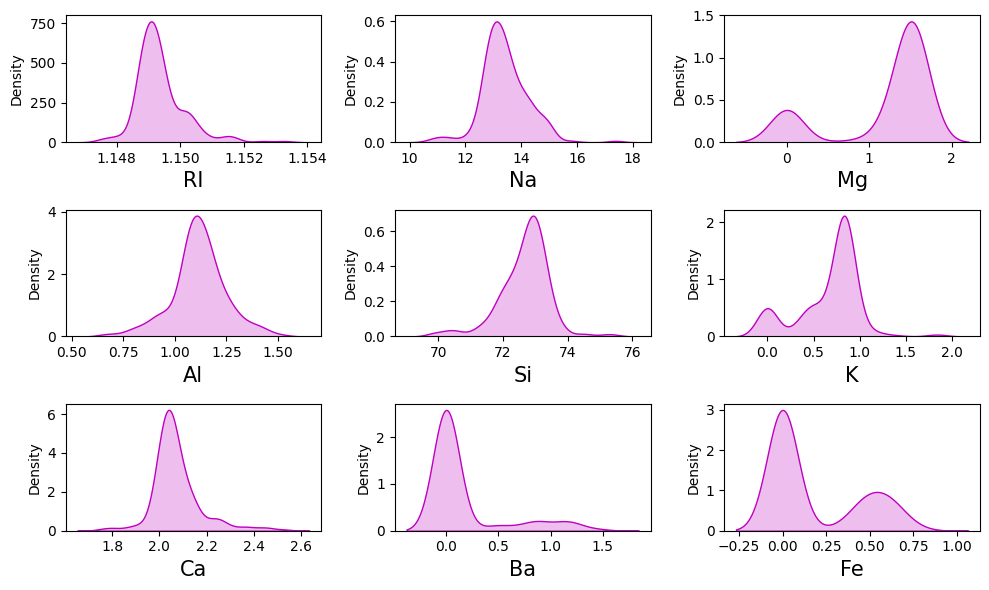

In [30]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [32]:
# Let's review the summary description again.
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.149363,13.406761,1.192173,1.115837,72.655023,0.669618,2.071683,0.163273,0.177532,0.760563
std,0.000766,0.818371,0.602021,0.131577,0.774052,0.332190,0.102548,0.371360,0.261034,0.427745
min,1.147544,10.730000,0.000000,0.661911,69.810000,0.000000,1.757654,0.000000,0.000000,0.000000
25%,1.148901,12.900000,1.278543,1.059699,72.280000,0.506580,2.019803,0.000000,0.000000,1.000000
50%,1.149194,13.300000,1.515397,1.107932,72.790000,0.824257,2.048800,0.000000,0.000000,1.000000
75%,1.149565,13.830000,1.532619,1.176872,73.090000,0.848093,2.093860,0.000000,0.464159,1.000000
max,1.153281,17.380000,1.584751,1.518294,75.410000,1.838078,2.529777,1.465897,0.798957,1.000000


#### Checking outliers

In [33]:
# We can see outlier in dataset so we will try to remove.
# Removing outliers

from scipy import stats
for col in df.columns:
    z_scores = stats.zscore(df[col])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    df = df[filtered_entries]

In [34]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.149282,13.411316,1.278149,1.114339,72.735737,0.662244,2.063667,0.130423,0.186192,0.805263
std,0.000543,0.651045,0.532989,0.115450,0.559801,0.294790,0.064540,0.317559,0.262820,0.397044
min,1.147797,11.560000,0.000000,0.777498,71.150000,0.000000,1.920191,0.000000,0.000000,0.000000
25%,1.148899,12.930000,1.418627,1.059699,72.380000,0.522269,2.020415,0.000000,0.000000,1.000000
50%,1.149182,13.280000,1.518294,1.107932,72.830000,0.824257,2.047608,0.000000,0.000000,1.000000
75%,1.149505,13.772500,1.534037,1.170207,73.087500,0.843433,2.086037,0.000000,0.464159,1.000000
max,1.151459,15.150000,1.584751,1.422757,74.550000,1.032280,2.304591,1.179274,0.798957,1.000000


RI                  Axes(0.125,0.53;0.110714x0.35)
Na               Axes(0.257857,0.53;0.110714x0.35)
Mg               Axes(0.390714,0.53;0.110714x0.35)
Al               Axes(0.523571,0.53;0.110714x0.35)
Si               Axes(0.656429,0.53;0.110714x0.35)
K                Axes(0.789286,0.53;0.110714x0.35)
Ca                  Axes(0.125,0.11;0.110714x0.35)
Ba               Axes(0.257857,0.11;0.110714x0.35)
Fe               Axes(0.390714,0.11;0.110714x0.35)
Type of glass    Axes(0.523571,0.11;0.110714x0.35)
dtype: object

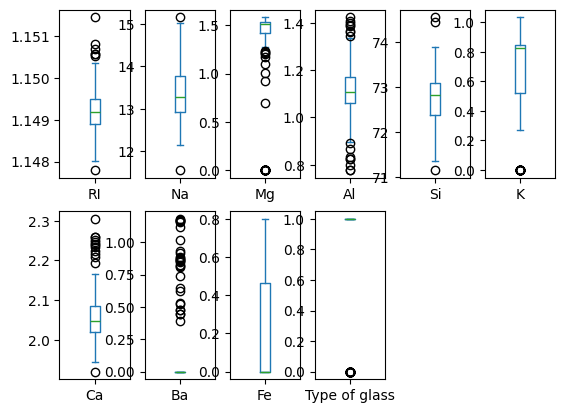

In [35]:
# After removing outliear.
df.plot(kind = 'box', subplots=True,layout=(2,6))

In [36]:
# Define percentiles for trimming
lower_percentile = 5  # remove bottom 5% of data
upper_percentile = 95  # remove top 5% of data

# Calculate thresholds
lower_threshold = np.percentile(df['Al'], lower_percentile)
upper_threshold = np.percentile(df['Al'], upper_percentile)

# Keep rows where 'Al' values are within the thresholds
df = df[(df['Al'] >= lower_threshold) & (df['Al'] <= upper_threshold)]


RI                  Axes(0.125,0.53;0.110714x0.35)
Na               Axes(0.257857,0.53;0.110714x0.35)
Mg               Axes(0.390714,0.53;0.110714x0.35)
Al               Axes(0.523571,0.53;0.110714x0.35)
Si               Axes(0.656429,0.53;0.110714x0.35)
K                Axes(0.789286,0.53;0.110714x0.35)
Ca                  Axes(0.125,0.11;0.110714x0.35)
Ba               Axes(0.257857,0.11;0.110714x0.35)
Fe               Axes(0.390714,0.11;0.110714x0.35)
Type of glass    Axes(0.523571,0.11;0.110714x0.35)
dtype: object

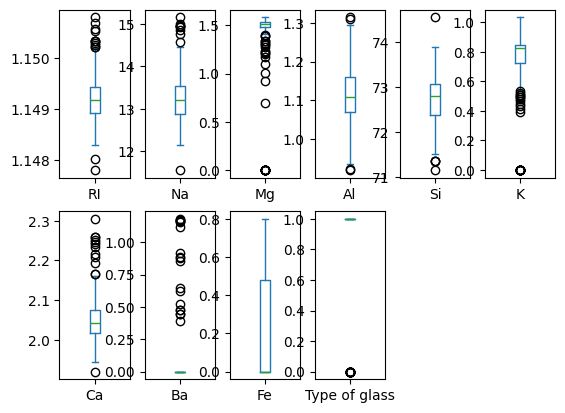

In [37]:
# After removing outliear.
df.plot(kind = 'box', subplots=True,layout=(2,6))

In [38]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.149265,13.318765,1.355535,1.115244,72.728412,0.704398,2.058040,0.092179,0.189811,0.847059
std,0.000499,0.609761,0.438340,0.079371,0.525044,0.273844,0.063699,0.278979,0.266878,0.360994
min,1.147797,11.560000,0.000000,0.920516,71.150000,0.000000,1.920191,0.000000,0.000000,0.000000
25%,1.148923,12.872500,1.484262,1.069258,72.382500,0.724316,2.017554,0.000000,0.000000,1.000000
50%,1.149182,13.210000,1.520460,1.107932,72.800000,0.826696,2.043625,0.000000,0.000000,1.000000
75%,1.149443,13.545000,1.534037,1.159778,73.060000,0.848093,2.076030,0.000000,0.479142,1.000000
max,1.150812,15.150000,1.584751,1.314242,74.550000,1.032280,2.304591,1.179274,0.798957,1.000000


In [40]:
# Define percentiles for trimming
lower_percentile = 5  # remove bottom 5% of data
upper_percentile = 95  # remove top 5% of data

# Calculate thresholds
lower_threshold = np.percentile(df['Na'], lower_percentile)
upper_threshold = np.percentile(df['Na'], upper_percentile)

# Keep rows where 'Al' values are within the thresholds
df = df[(df['Na'] >= lower_threshold) & (df['Na'] <= upper_threshold)]

RI                  Axes(0.125,0.53;0.110714x0.35)
Na               Axes(0.257857,0.53;0.110714x0.35)
Mg               Axes(0.390714,0.53;0.110714x0.35)
Al               Axes(0.523571,0.53;0.110714x0.35)
Si               Axes(0.656429,0.53;0.110714x0.35)
K                Axes(0.789286,0.53;0.110714x0.35)
Ca                  Axes(0.125,0.11;0.110714x0.35)
Ba               Axes(0.257857,0.11;0.110714x0.35)
Fe               Axes(0.390714,0.11;0.110714x0.35)
Type of glass    Axes(0.523571,0.11;0.110714x0.35)
dtype: object

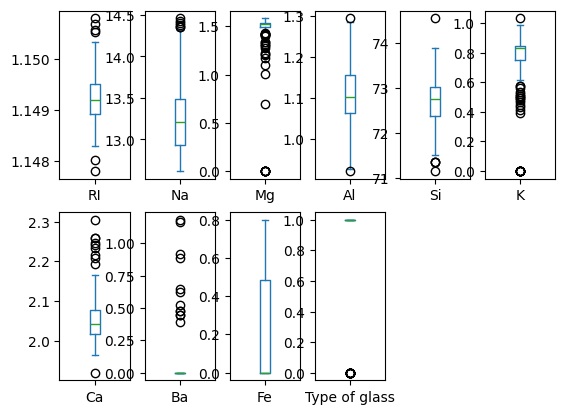

In [41]:
# After removing outliear.
df.plot(kind = 'box', subplots=True,layout=(2,6))

In [42]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1.149286,13.283618,1.413616,1.106527,72.685921,0.734667,2.057747,0.053756,0.189797,0.888158
std,0.000510,0.448781,0.351936,0.075039,0.521166,0.235474,0.064022,0.199396,0.269423,0.316214
min,1.147797,12.620000,0.000000,0.920516,71.150000,0.000000,1.920191,0.000000,0.000000,0.000000
25%,1.148928,12.930000,1.498888,1.061919,72.367500,0.753096,2.016734,0.000000,0.000000,1.000000
50%,1.149204,13.210000,1.521901,1.102474,72.750000,0.829134,2.042826,0.000000,0.000000,1.000000
75%,1.149511,13.492500,1.535452,1.154800,73.010000,0.848093,2.077577,0.000000,0.482667,1.000000
max,1.150812,14.460000,1.584751,1.294653,74.550000,1.032280,2.304591,1.179274,0.798957,1.000000


In [43]:
# Now Correlation between target variable and independent variable.
cor = df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,0.300480,-0.244183,-0.424608,-0.603334,-0.336966,0.746460,0.060327,0.081005,-0.185715
Na,0.300480,1.000000,-0.248269,-0.019681,-0.461764,-0.654825,0.158510,0.216172,-0.182932,-0.274796
Mg,-0.244183,-0.248269,1.000000,-0.356764,-0.238838,0.353458,-0.602476,-0.322820,0.084494,0.699018
Al,-0.424608,-0.019681,-0.356764,1.000000,0.281404,0.090310,-0.192786,0.256732,-0.129180,-0.403545
Si,-0.603334,-0.461764,-0.238838,0.281404,1.000000,0.123937,-0.286891,0.071573,-0.086598,-0.219385
K,-0.336966,-0.654825,0.353458,0.090310,0.123937,1.000000,-0.374547,-0.305068,0.141136,0.552108
Ca,0.746460,0.158510,-0.602476,-0.192786,-0.286891,-0.374547,1.000000,0.006556,0.100476,-0.448939
Ba,0.060327,0.216172,-0.322820,0.256732,0.071573,-0.305068,0.006556,1.000000,0.044183,-0.311077
Fe,0.081005,-0.182932,0.084494,-0.129180,-0.086598,0.141136,0.100476,0.044183,1.000000,0.137850
Type of glass,-0.185715,-0.274796,0.699018,-0.403545,-0.219385,0.552108,-0.448939,-0.311077,0.137850,1.000000


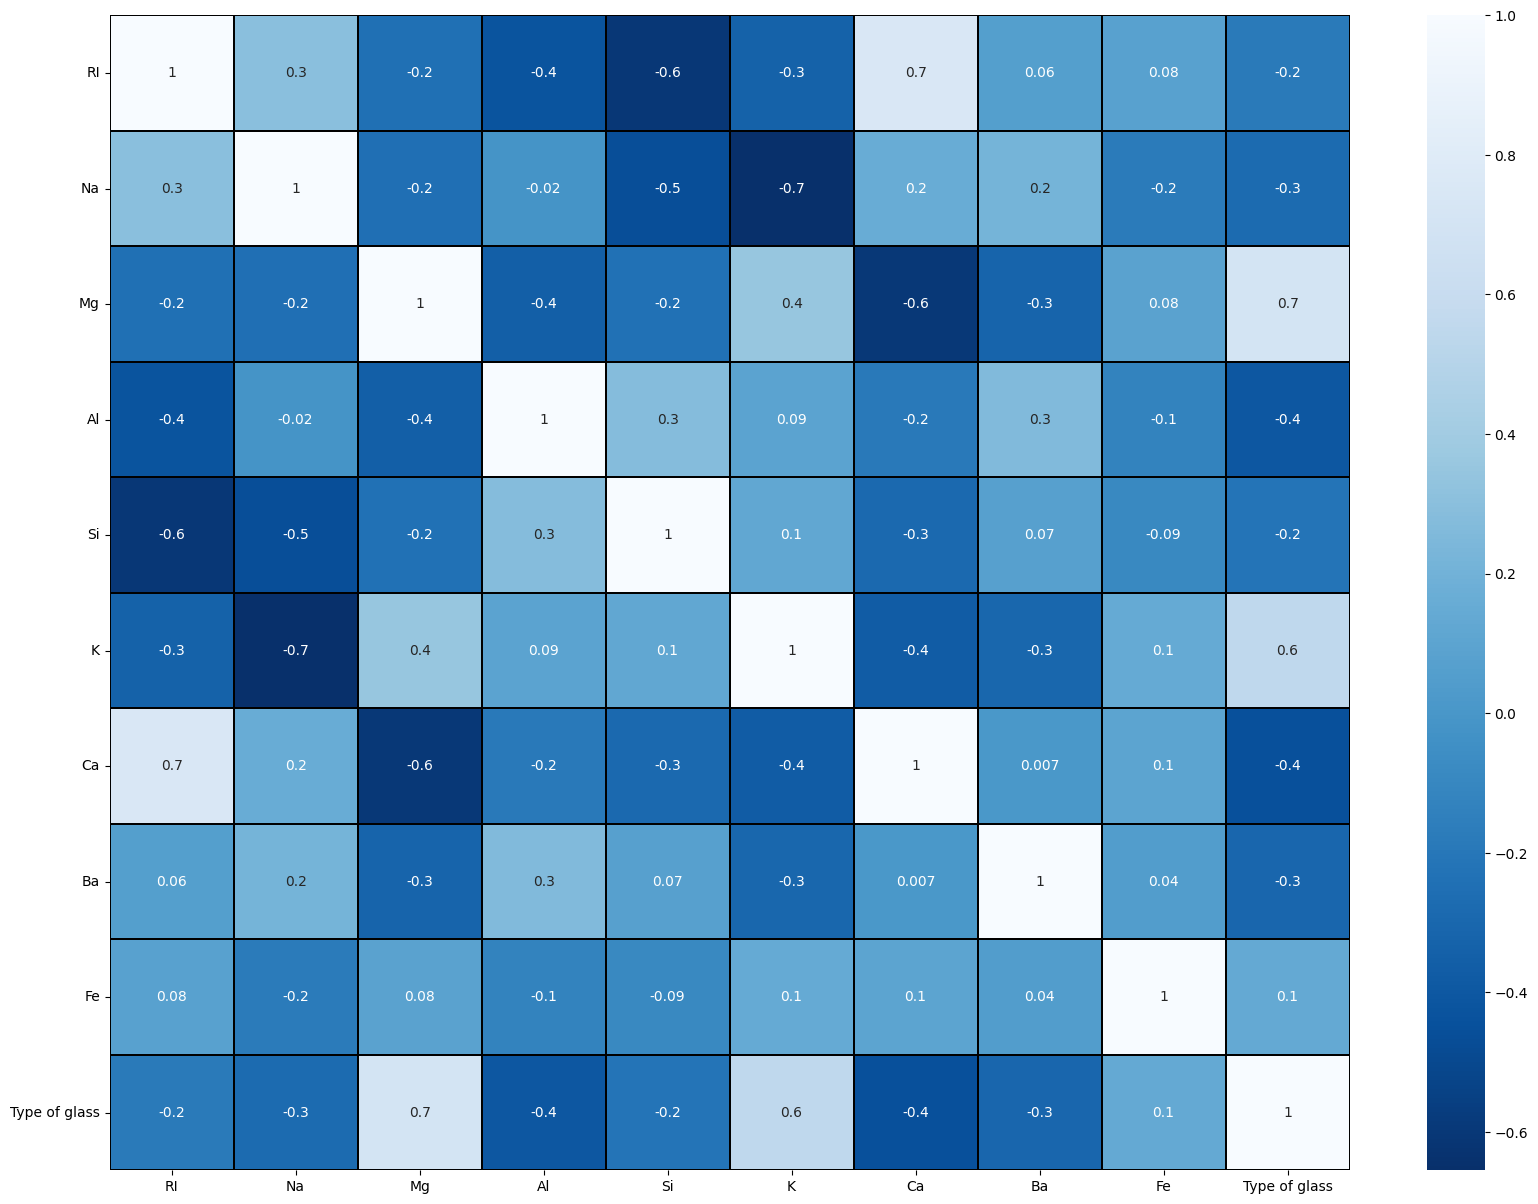

In [44]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation = 0)

plt.show()

In [45]:
# There is not much positive correlation between the target and features.
# As we can see hightly negative correlation
# We observe a negative correlation between Mg with Na, AI, Si, Ca. Let's see all these in next steps.

In [46]:
# We can clearly see that there is no positive correlation with the target value,
# but there is a highly negative correlation with the target value.
cor['Type of glass'].sort_values(ascending=False)

Type of glass    1.000000
Mg               0.699018
K                0.552108
Fe               0.137850
RI              -0.185715
Si              -0.219385
Na              -0.274796
Ba              -0.311077
Al              -0.403545
Ca              -0.448939
Name: Type of glass, dtype: float64

In [47]:
# Separating feature and label
x = df.drop('Type of glass', axis=1)
y = df['Type of glass']

In [48]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [49]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature Values'] = x.columns

In [50]:
vif
# So, we can clearly see that there is no multicollinearity present, so we don't need to drop any columns.

,VIF Values,Feature Values
0,4.643631,RI
1,4.669051,Na
2,6.750105,Mg
3,2.199175,Al
4,5.162191,Si
5,3.069738,K
6,7.294385,Ca
7,1.521457,Ba
8,1.138136,Fe


In [51]:
# As we have observed a high correlation that affects the target value, dropping that column can resolve the issue.  
df.drop('Si', axis=1, inplace=True)

In [52]:
# Again checking
# Separating feature and label
x = df.drop('Type of glass', axis=1)
y = df['Type of glass']

In [53]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [54]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature Values'] = x.columns

In [55]:
vif
# So, we can clearly see that there is no multicollinearity present, so we don't need to drop any columns.

,VIF Values,Feature Values
0,3.743979,RI
1,2.133042,Na
2,3.273773,Mg
3,1.843168,Al
4,2.321376,K
5,5.744234,Ca
6,1.502704,Ba
7,1.132125,Fe


In [56]:
# Now we can move to the model building
y.value_counts()

Type of glass
1.0    135
0.0     17
Name: count, dtype: int64

In [57]:
# We can see that there is class imbalance in the target values, so we need to address it by using an oversampling method.

### OverSampling

In [58]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [59]:
# Checking again
y.value_counts()

Type of glass
1.0    135
0.0     17
Name: count, dtype: int64

In [61]:
# We have resolved the class imbalance issue by using oversampling method.
y1.value_counts()

Type of glass
1.0    135
0.0    135
Name: count, dtype: int64

### Modelling

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    RER = RandomForestClassifier()
    RER.fit(x_train, y_train)
    pred = RER.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRs = i
print("Best Accuracy is ", maxAcc, "at random_state ", maxRs)

Best Accuracy is  1.0 at random_state  16


In [63]:
# Creating train test split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=.30, random_state=maxRs)

In [64]:
# Classification Algorithmfrom 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

## RandomForestClassifier

In [65]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)

In [66]:
print("Accuracy of this model ", accuracy_score(y_test, predRFC)*100)

print(confusion_matrix(y_test, predRFC))

print(classification_report(y_test, predRFC))

Accuracy of this model  100.0
[[40  0]
 [ 0 41]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        41

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



## ExtraTreesClassifier

In [67]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predET)*100)

print(confusion_matrix(y_test, predET))

print(classification_report(y_test, predET))

Accuracy of this model  97.53086419753086
[[40  0]
 [ 2 39]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        40
         1.0       1.00      0.95      0.97        41

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81



## GradientBoostingClassifier

In [68]:
# Checking accuracy for GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predGBC)*100)

print(confusion_matrix(y_test, predGBC))

print(classification_report(y_test, predGBC))

Accuracy of this model  100.0
[[40  0]
 [ 0 41]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        41

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



## BaggingClassifier

In [69]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predBC)*100)

print(confusion_matrix(y_test, predBC))

print(classification_report(y_test, predBC))

Accuracy of this model  100.0
[[40  0]
 [ 0 41]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        41

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



## LogisticRegression

In [70]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predLR)*100)

print(confusion_matrix(y_test, predLR))

print(classification_report(y_test, predLR))

Accuracy of this model  98.76543209876543
[[40  0]
 [ 1 40]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        40
         1.0       1.00      0.98      0.99        41

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81



## SVC

In [71]:
# Checking accuracy for SVC
SV = SVC()
SV.fit(x_train, y_train)
predSV = SV.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predSV)*100)

print(confusion_matrix(y_test, predSV))

print(classification_report(y_test, predSV))

Accuracy of this model  98.76543209876543
[[40  0]
 [ 1 40]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        40
         1.0       1.00      0.98      0.99        41

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81



In [72]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(RFC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predRFC) - score.mean()

[0.98148148 0.94444444 1.         0.88888889 1.        ]
0.962962962962963


0.03703703703703698

In [73]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(ET, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predET) - score.mean()

[0.98148148 0.96296296 1.         0.88888889 1.        ]
0.9666666666666668


0.008641975308641858

In [74]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(GBC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predGBC) - score.mean()

[0.98148148 0.96296296 1.         0.85185185 1.        ]
0.9592592592592594


0.04074074074074063

In [75]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(BC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predBC) - score.mean()

[0.98148148 0.96296296 0.98148148 0.87037037 1.        ]
0.9592592592592591


0.040740740740740855

In [76]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(LR, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predLR) - score.mean()

[0.98148148 0.96296296 0.98148148 0.88888889 1.        ]
0.962962962962963


0.024691358024691246

In [77]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(SV, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predSV) - score.mean()

[0.98148148 0.94444444 1.         0.88888889 1.        ]
0.962962962962963


0.024691358024691246

In [78]:
# As you can see our best model is BaggingClassifier, Gradient Boosting Classifier, and Random Forest Classifier is the best.

In [81]:
# Hyper Parameter Turning
# Extree Classifier
from sklearn.model_selection import GridSearchCV
parameter = {
    'criterion' : ['gini', 'entropy'],
    'random_state' : [10, 50, 1000],
    'max_depth' : [0, 10, 20],
    'n_jobs' : [-2, -1, 1],
    'n_estimators' : [50, 100, 200, 300]
}
GCV = GridSearchCV(RandomForestClassifier(), parameter, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [82]:
Final_model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators= 100, n_jobs=-2, random_state=50)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

1.0

## AUC and ROC

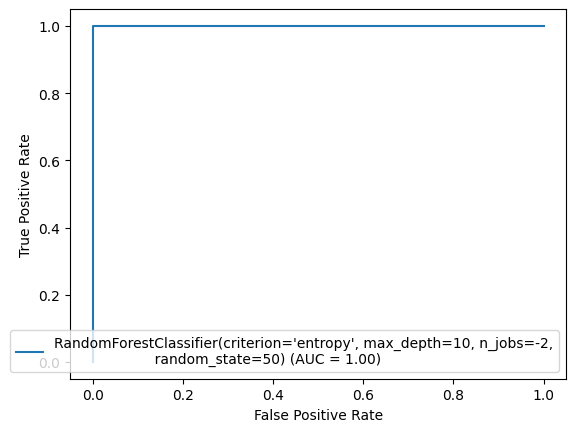

In [84]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

In [86]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model, 'type_of_glass.pkl')

['type_of_glass.pkl']

In [87]:
# Predicting the saved model
model = joblib.load('type_of_glass.pkl')
prediction = model.predict(x_test)

In [88]:
# Confirming
a = np.array(y_test)
df = pd.DataFrame()
df['Predict'] = prediction
df['Original'] = a
df

,Predict,Original
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
76,1.0,1.0
77,0.0,0.0
78,0.0,0.0
79,0.0,0.0
